# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy 
import json
import re

%matplotlib inline

In [2]:
#Read CSV file 
twitterArchive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#Downloaded from URL
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)


In [4]:
#Read TSV file
imagePrediction = pd.read_csv('image-predictions.tsv', sep='\t' )

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
#Get tweets id from 'twitter-archive-enhanced.csv' and 'image-predictions.tsv'
tweetIdList = []

for id_ in twitterArchive['tweet_id']:
    tweetIdList.append(id_)
    
for id_ in imagePrediction['tweet_id']:
    if id_ not in tweetIdList:
        tweetIdList.append(id_)


len(tweetIdList)

2356

In [6]:

keyApi = ""
keyApiSecret = ""
bearerToken = ""
accessToken = ""
accessTokenSecret = ""


# Authenticate to Twitter

auth = tweepy.OAuthHandler(keyApi, keyApiSecret)
auth.set_access_token(accessToken,accessTokenSecret)
 
api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(),
                 wait_on_rate_limit=True)
                 

In [7]:
#Using tweepy to get each tweets by using tweet id from 'twitter-archive-enhanced.csv' and 'image-predictions.tsv'

tweetFindList =[]
cantFindTweet =[]

for tweetId in tweetIdList:
    try:
        tweetFindList.append(api.get_status(tweetId))
    
    except Exception as e:
        cantFindTweet.append(tweetId)
       

Rate limit reached. Sleeping for: 528
Rate limit reached. Sleeping for: 532


In [8]:

# Put each json tweet separitly in list

dictList = []

for eachJsonTweet in tweetFindList:
    dictList.append(eachJsonTweet)


In [9]:
#Write json list in text file

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(dictList, indent=4))


In [10]:
#Read json file to get data of tweets and transfer them to dataframe
myTweetList = []

with open('tweet_json.txt', encoding='utf-8') as jsonFile:  
    allJsonData = json.load(jsonFile)
    for eachJsonDictionary in allJsonData:
        tweetId = eachJsonDictionary['id']
        favoriteCount = eachJsonDictionary['favorite_count']
        retweetCount = eachJsonDictionary['retweet_count']
        source = eachJsonDictionary['source'][eachJsonDictionary['source'].find('rel="nofollow">') + 15:-4]
        
        myTweetList.append({'tweet_id': int(tweetId),
                                   'favorite_count': int(favoriteCount),
                                   'retweet_count': int(retweetCount),
                                    'source': source
                                  })
        
        tweetJson = pd.DataFrame(myTweetList, columns = ['tweet_id', 'favorite_count', 'retweet_count', 'source'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [11]:
#Display this dataset to visualize assessing
twitterArchive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
#Display this dataset to assessing programmatically
twitterArchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
#Display this dataset to assessing programmatically
twitterArchive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
#Display unique value in this column
twitterArchive['doggo'].unique()

array(['None', 'doggo'], dtype=object)

In [15]:
#Display unique value in this column
twitterArchive['floofer'].unique()

array(['None', 'floofer'], dtype=object)

In [16]:
#Display unique value in this column
twitterArchive['pupper'].unique()

array(['None', 'pupper'], dtype=object)

In [17]:
#Display unique value in this column
twitterArchive['puppo'].unique()

array(['None', 'puppo'], dtype=object)

In [18]:
#Display count value in this column
twitterArchive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [19]:
#Display count value in this column
twitterArchive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [20]:
#display some text to see what in it
for i in range(10):
    print(twitterArchive['text'][i])

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

https://t.co/Zr4hWfAs1H https://t.

In [21]:
#Display count value in this column
twitterArchive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [22]:
#Display this dataset to visualize assessing
imagePrediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [23]:
imagePrediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
imagePrediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
imagePrediction.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [26]:
imagePrediction.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [27]:
imagePrediction.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [28]:
#number of duplicate jpg_url
sum(imagePrediction.jpg_url.duplicated())

66

In [29]:
#Display this dataset to visualize assessing
tweetJson

,tweet_id,favorite_count,retweet_count,source
0,892420643555336193,33546,6945,Twitter for iPhone
1,892177421306343426,29082,5247,Twitter for iPhone
2,891815181378084864,21883,3457,Twitter for iPhone
3,891689557279858688,36606,7163,Twitter for iPhone
4,891327558926688256,35009,7688,Twitter for iPhone
...,...,...,...,...
2320,666049248165822465,88,36,Twitter for iPhone
2321,666044226329800704,246,114,Twitter for iPhone
2322,666033412701032449,100,36,Twitter for iPhone
2323,666029285002620928,112,39,Twitter for iPhone


In [30]:
tweetJson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2325 non-null   int64 
 1   favorite_count  2325 non-null   int64 
 2   retweet_count   2325 non-null   int64 
 3   source          2325 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [31]:
tweetJson.describe()

,tweet_id,favorite_count,retweet_count
count,2.325000e+03,2325.000000,2325.000000
mean,7.417278e+17,7000.438710,2451.023226
std,6.817828e+16,10870.888169,4147.821418
min,6.660209e+17,0.000000,1.000000
25%,6.780233e+17,1218.000000,492.000000
50%,7.177900e+17,3030.000000,1141.000000
75%,7.986440e+17,8538.000000,2840.000000
max,8.924206e+17,143611.000000,69993.000000


## Quality issues
### twitterArchive

1. Only using original tweets. 
2. Erroneous datatypes of timestamp column and separate date and time.
3. Getting the type of source that has been created a tweet from the source column. 
4. rating_denominator column has wrong values. 
5. Outliers in rating_numerator.
6. names of dogs are not correct such as (a, an). Also, the None values transform to NaN.   

### imagePrediction

7. jpg_url column has 66 duplications.
8. dog breeds in the columns (p1, p2, p3) are not lower or uppercase letters and use underscore rather than space.
9. type of dog and confidence rate in from columns (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog)

### tweetJson

- We don't have any issue with data quality because we get specific columns that are used in the analysis.


## Tidiness issues

10. (doggo, floofer, pupper and puppo) columns are (transform to one column).
11. Delete columns that are not used in the analysis.
12. We've three datasets that need to merge into one dataset by using tweet id.
 


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [32]:
# Make copies of original pieces of data
twitterArchive_clean = twitterArchive.copy()
imagePrediction_clean = imagePrediction.copy()
tweetJson_clean = tweetJson.copy()

### Issue #1:

#### Define: 
getting null values of (retweeted_status_id , in_reply_to_status_id)

#### Code

In [33]:
df_twitterArchive_clean1 = twitterArchive_clean.retweeted_status_id.isnull()
df_twitterArchive_clean2 = twitterArchive_clean.in_reply_to_status_id.isnull()
twitterArchive_clean = twitterArchive_clean[df_twitterArchive_clean1 & df_twitterArchive_clean2]

#### Test

In [34]:
twitterArchive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Issue #2:

#### Define:
Convert datatypes of timestamp column

#### Code

In [35]:
twitterArchive_clean['timestamp'] = pd.to_datetime(twitterArchive_clean['timestamp'])
twitterArchive_clean['timestamp'] = twitterArchive_clean['timestamp'].dt.date
twitterArchive_clean['timestamp'] = pd.to_datetime(twitterArchive_clean['timestamp'])

#### Test

In [36]:
twitterArchive_clean['timestamp']

0      2017-08-01
1      2017-08-01
2      2017-07-31
3      2017-07-30
4      2017-07-29
          ...    
2351   2015-11-16
2352   2015-11-16
2353   2015-11-15
2354   2015-11-15
2355   2015-11-15
Name: timestamp, Length: 2097, dtype: datetime64[ns]

### Issue #3:

#### Define:
Getting the source of tweet.

#### Code

In [37]:
twitterArchive_clean['source'] = twitterArchive_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

#### Test

In [38]:
twitterArchive_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Issue #4:

#### Define:
Change rating_denominator values to 10.

#### Code

In [39]:
twitterArchive_clean['rating_denominator'] = 10
twitterArchive_clean['rating_denominator'] = twitterArchive_clean['rating_denominator'].astype(float)

#### Test

In [40]:
twitterArchive_clean['rating_denominator'].value_counts()

10.0    2097
Name: rating_denominator, dtype: int64

### Issue #5:

#### Define:
getting rating_numerator from text

#### Code

In [41]:
ratingNumerator = pd.DataFrame(twitterArchive_clean['text'].str.findall(r'(\d+\.?\d+|\d+)\/').apply(lambda x: x[-1]).tolist(), index=twitterArchive_clean.index)
twitterArchive_clean['rating_numerator'] = ratingNumerator.astype(float)

#### Test

In [42]:
twitterArchive_clean['rating_numerator']

0       13.0
1       13.0
2       12.0
3       13.0
4       12.0
        ... 
2351     5.0
2352     6.0
2353     9.0
2354     7.0
2355     8.0
Name: rating_numerator, Length: 2097, dtype: float64

### Issue #6:

#### Define:
Changing uncorrect name to null

#### Code

In [43]:

lowercaseName = twitterArchive_clean[twitterArchive_clean['name'].str[0].str.islower().fillna(False)]['name']

twitterArchive_clean['name'].replace(lowercaseName.to_list(),np.nan, inplace = True)
twitterArchive_clean['name'].replace('None',np.nan, inplace = True)

#### Test

In [44]:
twitterArchive_clean['name'].isnull().sum()

707

### Issue #7:

#### Define:
remove dublication of jpg_url

#### Code

In [45]:
imagePrediction_clean.drop_duplicates(subset=['jpg_url'], keep='last', inplace= True)

#### Test

In [46]:
sum(imagePrediction_clean['jpg_url'].duplicated())

0

### Issue #8:

#### Define:
Removing underscore and change the first letter of breds name to capital

#### Code

In [47]:
#Remove Underscore
for breed in ['p1', 'p2', 'p3']:
    imagePrediction_clean[breed] = imagePrediction_clean[breed].str.replace('_',' ')

In [48]:
#Capitalization first letter of each breed name
def CapitalBreedsLetter(breed):
    breedName = [name.capitalize() for name in (breed.split(' '))]
    return ' '.join(breedName)

for breed in ['p1', 'p2', 'p3']:
    imagePrediction_clean[breed] = imagePrediction_clean[breed].apply(CapitalBreedsLetter)



#### Test

In [49]:
imagePrediction_clean[['p1','p2','p3']]

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman
...,...,...,...
2070,Basset,English Springer,German Short-haired Pointer
2071,Paper Towel,Labrador Retriever,Spatula
2072,Chihuahua,Malamute,Kelpie
2073,Chihuahua,Pekinese,Papillon


### Issue #9:

#### Define:
Get first true predection

#### Code

In [50]:
# Get the first True predection 

breeds = []
confidenceRate = []

def getFirstPrediction(dataframe):
    if dataframe['p1_dog'] == True:
        breeds.append(dataframe['p1'])
        confidenceRate.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        breeds.append(dataframe['p2'])
        confidenceRate.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        breeds.append(dataframe['p3'])
        confidenceRate.append(dataframe['p3_conf'])
    else:
        breeds.append(np.nan)
        confidenceRate.append(0)

imagePrediction_clean.apply(getFirstPrediction, axis=1)
imagePrediction_clean['breeds'] = breeds
imagePrediction_clean['confidence_Rate'] = confidenceRate



#### Test

In [51]:
imagePrediction_clean[['breeds','confidence_Rate']]

,breeds,confidence_Rate
0,Welsh Springer Spaniel,0.465074
1,Redbone,0.506826
2,German Shepherd,0.596461
3,Rhodesian Ridgeback,0.408143
4,Miniature Pinscher,0.560311
...,...,...
2070,Basset,0.555712
2071,Labrador Retriever,0.168086
2072,Chihuahua,0.716012
2073,Chihuahua,0.323581


### Issue #10:

#### Define:
Transform the 4 columns of 'doggo', 'floofer', 'pupper', 'puppo' to one column

#### Code

In [52]:
twitterArchive_clean = pd.melt(twitterArchive_clean,
                               id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
                                           'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 
                                           'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 
                                           'rating_denominator', 'name'],
                               value_vars = ['doggo', 'floofer', 'pupper', 'puppo'],
                               var_name = 'type',
                               value_name = 'dogType')

twitterArchive_clean.drop('type', axis=1, inplace = True)

twitterArchive_clean = twitterArchive_clean.sort_values('dogType').drop_duplicates(subset='tweet_id', keep='last')


#### Test

In [53]:
twitterArchive_clean.dogType.value_counts()

None       1761
pupper      230
doggo        72
puppo        24
floofer      10
Name: dogType, dtype: int64

### Issue #11:

#### Define:
Deleting unnecessary columns.

#### Code

In [54]:
twitterArchive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
                                           'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)

imagePrediction_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1,
                           inplace=True)


tweetJson_clean.drop('source', axis=1, inplace=True)

#### Test

In [55]:
twitterArchive_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogType
2021,667405339315146752,2015-11-19,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,7.0,10.0,Biden,None
2020,667435689202614272,2015-11-19,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,12.0,10.0,NaN,None
2019,667437278097252352,2015-11-19,Twitter for iPhone,Never seen this breed before. Very pointy pup....,10.0,10.0,NaN,None
2018,667443425659232256,2015-11-19,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10.0,NaN,None
2017,667453023279554560,2015-11-19,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,None
...,...,...,...,...,...,...,...,...
6303,889665388333682689,2017-07-25,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,13.0,10.0,NaN,puppo
6305,889531135344209921,2017-07-24,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,13.0,10.0,Stuart,puppo
6374,874012996292530176,2017-06-11,Twitter for iPhone,This is Sebastian. He can't see all the colors...,13.0,10.0,Sebastian,puppo
6779,793195938047070209,2016-10-31,Twitter for iPhone,Say hello to Lily. She's pupset that her costu...,12.0,10.0,Lily,puppo


In [56]:
imagePrediction_clean

,tweet_id,jpg_url,breeds,confidence_Rate
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,0.560311
...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador Retriever,0.168086
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581


In [57]:
tweetJson_clean

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33546,6945
1,892177421306343426,29082,5247
2,891815181378084864,21883,3457
3,891689557279858688,36606,7163
4,891327558926688256,35009,7688
...,...,...,...
2320,666049248165822465,88,36
2321,666044226329800704,246,114
2322,666033412701032449,100,36
2323,666029285002620928,112,39


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [58]:
twitterArchiveMaster = pd.merge(twitterArchive_clean, tweetJson_clean, on = ['tweet_id'], how = 'left')

twitterArchiveMaster = pd.merge(twitterArchiveMaster, imagePrediction_clean, on = ['tweet_id'], how = 'left')


In [59]:
twitterArchiveMaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   rating_numerator    2097 non-null   float64       
 5   rating_denominator  2097 non-null   float64       
 6   name                1390 non-null   object        
 7   dogType             2097 non-null   object        
 8   favorite_count      2089 non-null   float64       
 9   retweet_count       2089 non-null   float64       
 10  jpg_url             1905 non-null   object        
 11  breeds              1606 non-null   object        
 12  confidence_Rate     1905 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), obje

In [60]:
twitterArchiveMaster = (twitterArchiveMaster[twitterArchiveMaster.jpg_url.notnull()])

In [61]:
twitterArchiveMaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1905 entries, 0 to 2096
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1905 non-null   int64         
 1   timestamp           1905 non-null   datetime64[ns]
 2   source              1905 non-null   object        
 3   text                1905 non-null   object        
 4   rating_numerator    1905 non-null   float64       
 5   rating_denominator  1905 non-null   float64       
 6   name                1302 non-null   object        
 7   dogType             1905 non-null   object        
 8   favorite_count      1898 non-null   float64       
 9   retweet_count       1898 non-null   float64       
 10  jpg_url             1905 non-null   object        
 11  breeds              1606 non-null   object        
 12  confidence_Rate     1905 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), obje

In [62]:
twitterArchiveMaster = (twitterArchiveMaster[twitterArchiveMaster.retweet_count.notnull()])

In [63]:
twitterArchiveMaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1898 entries, 0 to 2096
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1898 non-null   int64         
 1   timestamp           1898 non-null   datetime64[ns]
 2   source              1898 non-null   object        
 3   text                1898 non-null   object        
 4   rating_numerator    1898 non-null   float64       
 5   rating_denominator  1898 non-null   float64       
 6   name                1296 non-null   object        
 7   dogType             1898 non-null   object        
 8   favorite_count      1898 non-null   float64       
 9   retweet_count       1898 non-null   float64       
 10  jpg_url             1898 non-null   object        
 11  breeds              1599 non-null   object        
 12  confidence_Rate     1898 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), obje

In [64]:
twitterArchiveMaster.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [65]:
df = pd.read_csv('twitter_archive_master.csv')

In [66]:
df.head(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dogType,favorite_count,retweet_count,jpg_url,breeds,confidence_Rate
0,667405339315146752,2015-11-19,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,7.0,10.0,Biden,None,408.0,192.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,Saint Bernard,0.381377
1,667435689202614272,2015-11-19,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,12.0,10.0,NaN,None,267.0,76.0,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,Rottweiler,0.999091
2,667437278097252352,2015-11-19,Twitter for iPhone,Never seen this breed before. Very pointy pup....,10.0,10.0,NaN,None,394.0,197.0,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,NaN,0.000000
3,667443425659232256,2015-11-19,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10.0,NaN,None,681.0,482.0,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,NaN,0.000000
4,667453023279554560,2015-11-19,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,None,279.0,72.0,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador Retriever,0.825670


### Insights:
1. Relationship between retweets and favorites.

2. Avrage of rating for each dog types.

3. The top 10 breeds by number of retweet.

4. The most used source for tweeting.

### Visualization

#### 1. Relationship between retweets and favorites.

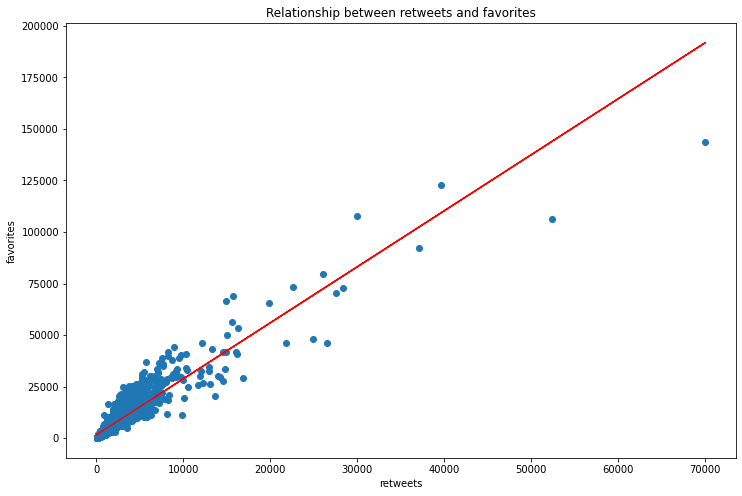

In [67]:
plt.figure(figsize=(12,8))
plt.scatter( df['retweet_count'], df['favorite_count'])

m, b = np.polyfit(df['retweet_count'], df['favorite_count'], 1)
plt.plot(df['retweet_count'], m*df['retweet_count']+b, color='red')

plt.title('Relationship between retweets and favorites')
plt.xlabel('retweets')
plt.ylabel('favorites')
plt.savefig('Relationship between retweets and favorites.png');

#### 2. Avrage of rating for each dog types.

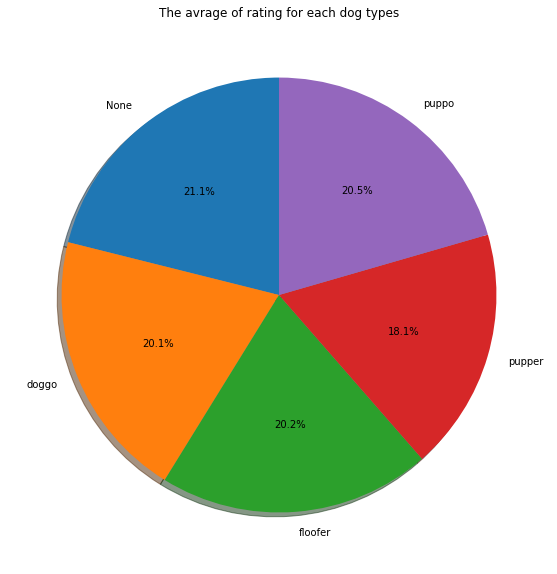

In [68]:
df1 = df.groupby('dogType').mean('rating_numerator')

plt.figure(figsize=(10,10))
plt.pie(df1['rating_numerator'],labels=['None', 'doggo', 'floofer', 'pupper', 'puppo'], autopct='%1.1f%%', shadow=True, 
        startangle=90)
plt.title('The avrage of rating for each dog types');

#### 3. The top 10 breeds by number of retweet .

Number of breeds: 113


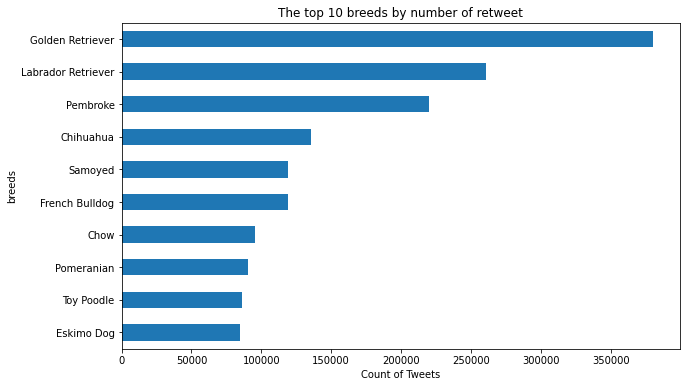

In [69]:
print('Number of breeds: ' + str(df['breeds'].nunique()))
df2 = df.groupby('breeds').sum('retweet_count').sort_values('retweet_count', ascending=False)['retweet_count'][:10]

df2.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('The top 10 breeds by number of retweet')
plt.xlabel('Count of Tweets');


#### 4. The most used source for tweeting

                    source
Twitter for iPhone    1862
Twitter Web Client      26
TweetDeck               10


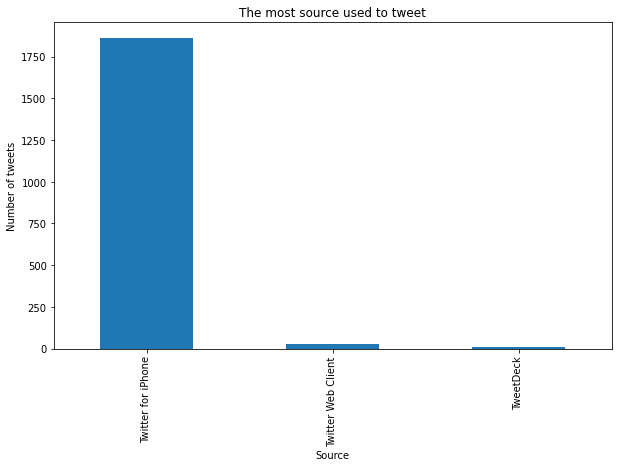

In [70]:
print(pd.DataFrame(df['source'].value_counts()))
df['source'].value_counts().plot(kind='bar', figsize=(10,6));
plt.title('The most source used to tweet')
plt.xlabel('Source')
plt.ylabel('Number of tweets');